### Q1.
write and explain matlab/ python code using FFT technique for feature engineering for the given dataset
(data1) and predict minimum one of the sensor data (temperature, humidity).

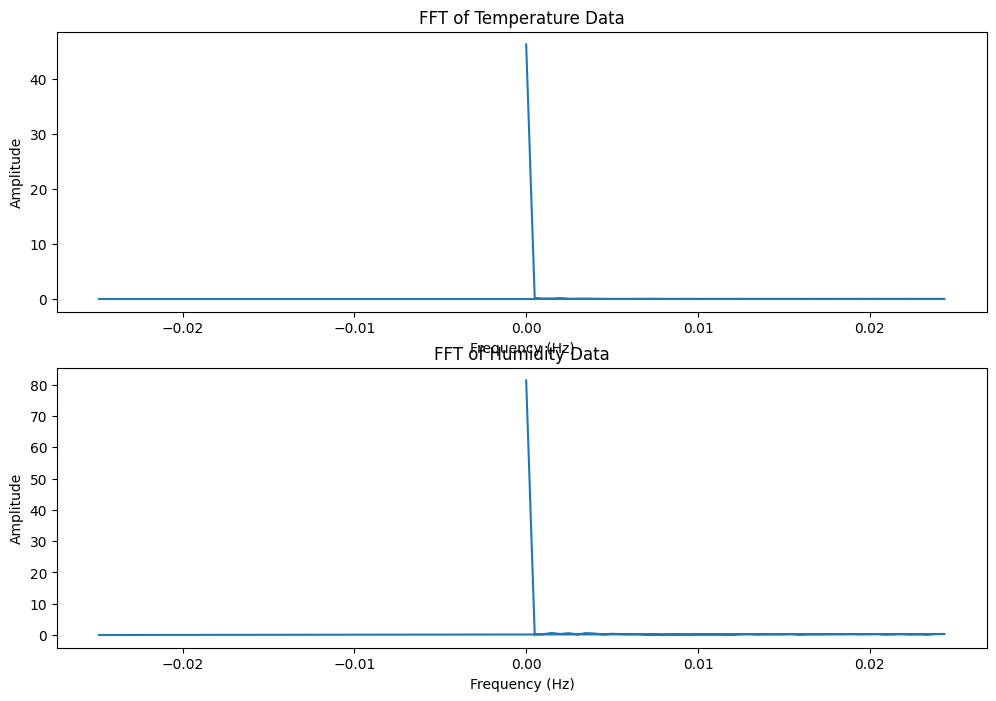

In [ ]:
import pandas as pd
import numpy as np
from scipy.fft import fft
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./data_1.csv')

time_series = pd.to_datetime(data['created_at'])
temperature = data['temperature']
humidity = data['humidity']

time_series = pd.to_datetime(data['created_at'])

# Perform FFT on the temperature or humidity data
fs = 1 / np.mean(np.diff(time_series.astype(int)) / 1e9)  # Convert to nanoseconds and then to seconds
n = len(temperature)

# Compute FFT
frequencies = np.fft.fftfreq(n, d=1/fs)
temperature_fft = np.fft.fft(temperature)
humidity_fft = np.fft.fft(humidity)

# Keep only positive frequencies
positive_frequencies = frequencies[:n // 2 + 1]
positive_temperature_fft = 2.0 / n * np.abs(temperature_fft[:n // 2 + 1])
positive_humidity_fft = 2.0 / n * np.abs(humidity_fft[:n // 2 + 1])

# Plot the FFT results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(positive_frequencies, positive_temperature_fft)
plt.title('FFT of Temperature Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(positive_frequencies, positive_humidity_fft)
plt.title('FFT of Humidity Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

Mean Squared Error: 0.042145917682821506
R^2 Score: 0.05236834889664965


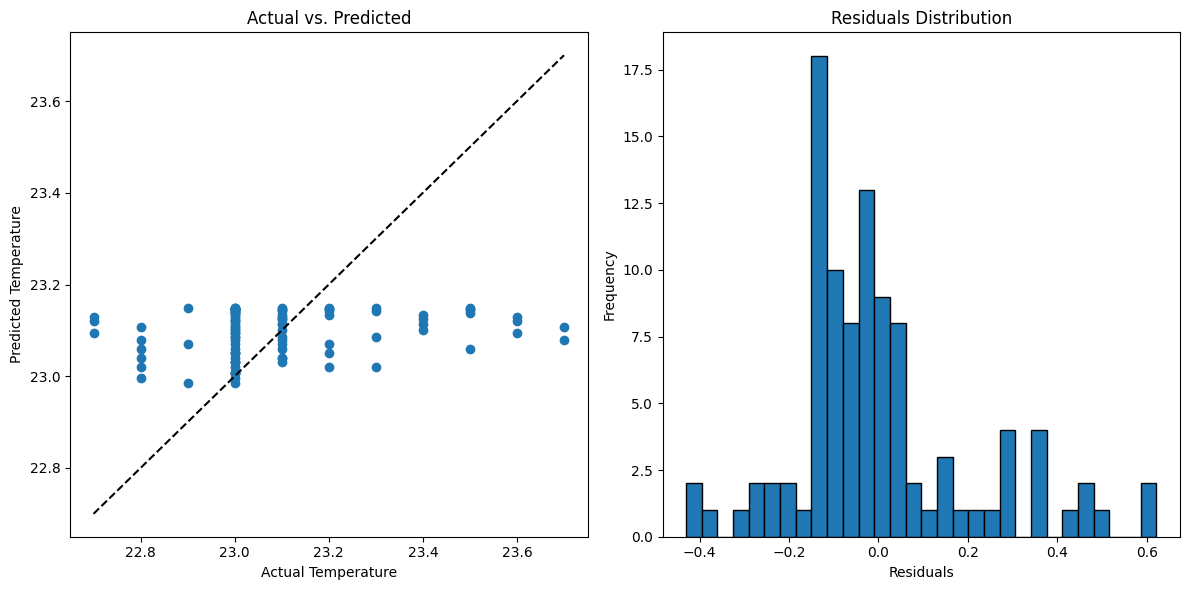

In [ ]:
# Example: Extract features for the dominant frequency
dominant_frequency = positive_frequencies[1]  #
temperature_feature = np.abs(np.cos(2 * np.pi * dominant_frequency * np.arange(1, n + 1) / fs))
humidity_feature = np.abs(np.sin(2 * np.pi * dominant_frequency * np.arange(1, n + 1) / fs))

# Train a simple model (linear regression)
X = np.column_stack((temperature_feature, humidity_feature))
y = temperature
model = LinearRegression().fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model (you can use other metrics based on your problem)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


plt.figure(figsize=(12, 6))

# Plot actual values
plt.subplot(1, 2, 1)
plt.scatter(y, predictions)
plt.plot([min(y), max(y)], [min(y), max(y)], '--k')  # Identity line
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Plot residuals
residuals = y - predictions
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()